In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels) , _ = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

In [5]:
train_images.shape

(60000, 784)

In [6]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])


model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

history = model.fit(train_images,
          random_train_labels,
          epochs = 100,
          batch_size = 128,
          validation_split = 0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1018 - loss: 2.3344 - val_accuracy: 0.1028 - val_loss: 2.3038
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1186 - loss: 2.2980 - val_accuracy: 0.1019 - val_loss: 2.3099
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1321 - loss: 2.2888 - val_accuracy: 0.1029 - val_loss: 2.3188
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1399 - loss: 2.2778 - val_accuracy: 0.1097 - val_loss: 2.3235
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1538 - loss: 2.2604 - val_accuracy: 0.1001 - val_loss: 2.3362
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1691 - loss: 2.2407 - val_accuracy: 0.1052 - val_loss: 2.3444
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1849 - loss: 2.2156 - val_accuracy: 0.1022 - val_loss: 2.3590
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2032 - loss: 2.1894 - val_accu

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

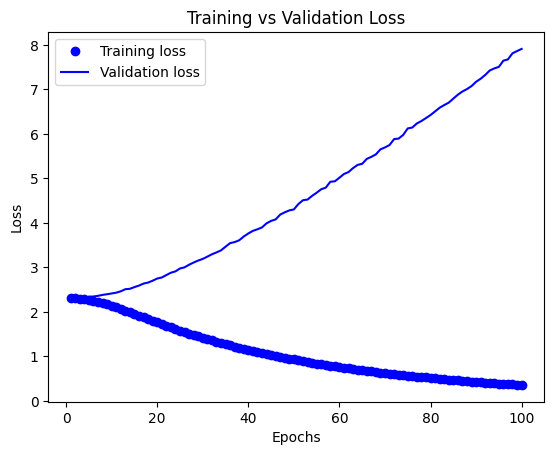

In [14]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, (len(loss) + 1))
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Even with shuffled train labels, training loss goes down, like memorizing

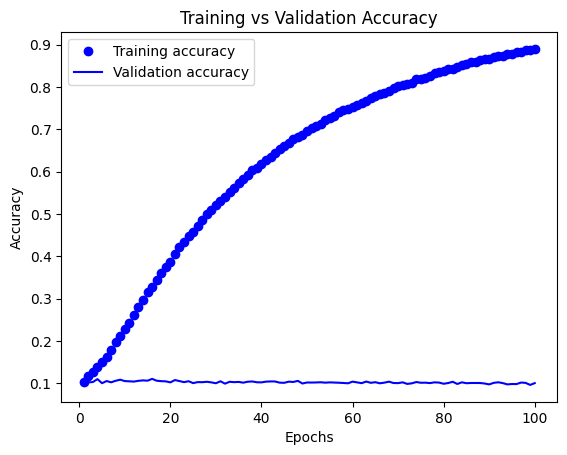

In [15]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, (len(acc) + 1))
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

In [16]:
# Latent manifolds: low-dimensional subspace in a high-dimensional parent input space
# Interpolation: it's always possible that morphing can happen in one of the manifolds. one input point can be morphed into another via a continuous path

In [17]:
# Denser input sampling less noise, valid inputs
# Smooth and continuous